In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize
from sklearn import svm
import pdb
test = sio.loadmat('test4.mat')
X = test['X']
y = test['y'].ravel()

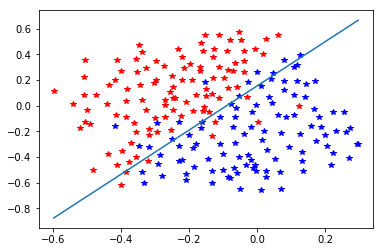

In [5]:

Xpos = X[y == 1, :]
Xneg = X[y == 0, :]
plt.plot(Xpos[:, 0], Xpos[:, 1], 'r*')
plt.plot(Xneg[:, 0], Xneg[:, 1], 'b*')
clf = svm.SVC(kernel="linear")
clf.fit(X, y)
coefs = clf.coef_.ravel()
temp = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
plt.plot(temp, (-coefs[0]*temp-clf.intercept_)/coefs[1])
plt.show()

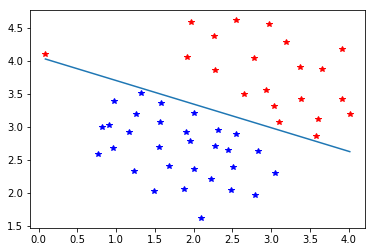

In [24]:
plt.plot(Xpos[:, 0], Xpos[:, 1], 'r*')
plt.plot(Xneg[:, 0], Xneg[:, 1], 'b*')
clf = svm.SVC(kernel="linear", C=100)
clf.fit(X, y)
coefs = clf.coef_.ravel()
temp = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
plt.plot(temp, (-coefs[0]*temp-clf.intercept_)/coefs[1])
plt.show()

In [54]:
test = sio.loadmat('test5.mat')
X = test['X']
y = test['y'].ravel()

In [56]:
clf = svm.SVC(gamma=50)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
u = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
v = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)

z = np.zeros((len(u), len(v)))

for i in range(0, len(u)):
    for j in range(0, len(v)):
        x = np.array([u[i], v[j]])
        # pdb.set_trace()
        z[i, j] = clf.predict(x[np.newaxis, :])

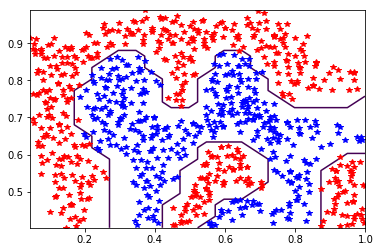

In [60]:
Xpos = X[y == 1, :]
Xneg = X[y == 0, :]
plt.plot(Xpos[:, 0], Xpos[:, 1], 'r*')
plt.plot(Xneg[:, 0], Xneg[:, 1], 'b*')
plt.contour(u, v, z.T, [.5])
plt.show()

In [10]:
test = sio.loadmat('test6.mat')
X = test['X']
y = test['y'].ravel()
Xval = test['Xval']
yval = test['yval'].ravel()

In [16]:
minerr = np.inf

for c in [.01, .03, .1, .3, 1, 3, 10, 30]:
    for sigma in [.01, .03, .1, .3, 1, 3, 10, 30]:
        clf = svm.SVC(gamma=1./2/sigma**2, C=c)
        clf.fit(Xval, yval)
        err = np.sum(clf.predict(Xval) != yval)
        # pdb.set_trace()
        if err < minerr:
            minerr = err
            bestclf = clf

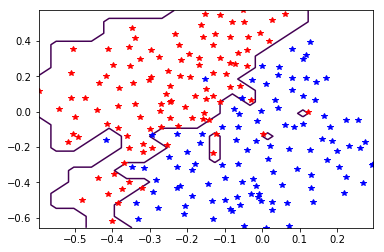

In [71]:
u = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
v = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
clf = svm.SVC(gamma=1./2/.03**2, C=1)
clf.fit(X, y)
z = np.zeros((len(u), len(v)))
for i in range(0, len(u)):
    for j in range(0, len(v)):
        x = np.array([u[i], v[j]])
        # pdb.set_trace()
        z[i, j] = clf.predict(x[np.newaxis, :])
Xpos = X[y == 1, :]
Xneg = X[y == 0, :]
plt.plot(Xpos[:, 0], Xpos[:, 1], 'r*')
plt.plot(Xneg[:, 0], Xneg[:, 1], 'b*')
plt.contour(u, v, z.T, [.7])
plt.show()

In [87]:
dicc = np.loadtxt('vocab.txt', dtype=str)
(dicc)

array([['1', 'aa'],
       ['2', 'ab'],
       ['3', 'abil'],
       ..., 
       ['1897', 'zdnet'],
       ['1898', 'zero'],
       ['1899', 'zip']], 
      dtype='|S40')

In [131]:
import re
from nltk.stem.porter import *
stemmer = PorterStemmer()


def email_stemmer(email, dic):
    email_ = re.sub('<[^<>]+>', ' ', email)
    email_ = re.sub('[0-9]+', 'number', email_)
    email_ = re.sub('(http|https)://[^\s]*', 'httpaddr', email_)
    email_ = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_)
    email_ = re.sub('[$]+', 'dollar', email_)
    result = np.array([], dtype=int)
    for word in re.split('[ @$/#.-:&*+=\[\]?!\(\)\{\},''">_<;%]', email_):
        word = re.sub('[^a-zA-Z0-9]', '', word)
        word = stemmer.stem(word)
        ind = dic[:, 0][dic[:, 1] == word]
        # pdb.set_trace()
        if ind.size != 0:
            result = np.append(result, int(ind.item()))
    return result

In [136]:
def feat(email, dic):
    result = np.zeros((dic.shape[0],))
    result[email] = 1
    return result

In [143]:
test = sio.loadmat('test7.mat')
X = test['X']
y = test['y'].ravel()
clf = svm.SVC(kernel="linear", C=0.1)
clf.fit(X, y)
coefs = clf.coef_.ravel()
coefs

array([ 0.00793208,  0.01563324,  0.05546492, ..., -0.08670606,
       -0.00661274,  0.06506632])

In [154]:
dicc[np.argsort(coefs)[-1:-10:-1], 1]

array(['our', 'click', 'remov', 'guarante', 'visit', 'basenumb', 'dollar',
       'will', 'price'], 
      dtype='|S40')